# Mining Software Repositories Assignment - 2

**1. Importing libraries and configurations**

In [1]:
# _importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# _configuring the matplotlib figure size 
plt.rcParams["figure.figsize"] = (7,5)

**2. Methods to visualize data**

In [3]:
# _custom method to draw pie chart
def show_pie_chart(data, labels, explode, title):
    fig, axis = plt.subplots()
    axis.pie(data, labels= labels, explode= explode, shadow= True, autopct= '%1.1f%%')
    fig.set_size_inches(5, 5)
    plt.title(title)
    plt.show()

In [4]:
# _custom method to draw bar chart
def show_bar_chart(data, labels, x_label, y_label, title):
    fig, axis = plt.subplots()
    axis.bar(labels, data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [5]:
# _custom method to visualize overlapping bar charts
def show_bar_chart_overlapped(data_1, data_2, labels, x_label, y_label, title):
    fig, axis = plt.subplots()
    axis.bar(labels, data_1)
    axis.bar(labels, data_2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(('Individual', 'both'))
    plt.show()

**3. Loading data from csv to pandas dataframe**

In [6]:
# _read csv after antlr4 processing
repo_df = pd.read_csv('mining_results/repository_mining_results.csv', index_col=0)
repo_df

,address,total_file_cnt,total_java_files,listener_pattern_cnt,visitor_pattern_cnt,enter_method_cnt,exit_method_cnt,enter_exit_method_cnt,visit_method_cnt
repo_id,,,,,,,,,
1,4455jkjh/Apktool-android,421,267,0,5,0,0,0,106
2,52Jolynn/SqlParser,57,17,0,0,0,0,0,0
3,Adrodoc/MPL,440,301,3,0,35,13,11,45
4,AlanHohn/antlr4-python,64,0,0,0,0,0,0,0
5,Andyccs/sqat,170,69,9,0,28,1,1,0
...,...,...,...,...,...,...,...,...,...
434,zendesk/maxwell,487,216,1,0,4,24,0,1
435,zhegexiaohuozi/JsoupXpath,101,64,0,1,0,0,0,26
436,zhunki/skyfire,166,20,0,0,0,0,0,0


**4. Preparing the dataset for Antlr4 Pattern Usage**

In [7]:
# _initializing data points to zero
visitor_pattern_cnt = 0
listener_pattern_cnt = 0
listener_visitor_both_cnt = 0
no_listener_visitor_cnt = 0

In [8]:
# _finding frequency counts of patterns by considering respective method counts in repositories
for enter, exit, visit in zip(repo_df['enter_method_cnt'], repo_df['exit_method_cnt'], repo_df['visit_method_cnt']):
    if visit > 0:
        visitor_pattern_cnt += 1
    if enter > 0 or exit > 0:
        listener_pattern_cnt += 1
        
    if (enter > 0 or exit > 0) and visit > 0:
        listener_visitor_both_cnt += 1
    elif enter == 0 and exit == 0 and visit == 0:
        no_listener_visitor_cnt += 1
        
visitor_pattern_cnt  -= listener_visitor_both_cnt
listener_pattern_cnt  -= listener_visitor_both_cnt

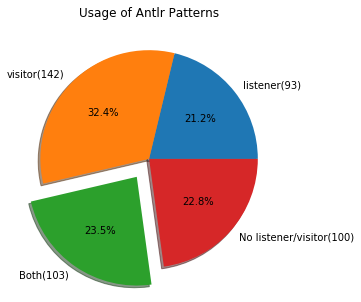

In [9]:
# _preparing data and labels needed for pie chart representation
pie_chart_datapoints = [listener_pattern_cnt, visitor_pattern_cnt, listener_visitor_both_cnt, no_listener_visitor_cnt]
pie_chart_labels = ['listener(' + str(listener_pattern_cnt) + ')', 'visitor(' + str(visitor_pattern_cnt) + ')', 'Both(' + str(listener_visitor_both_cnt) + ')', 'No listener/visitor(' + str(no_listener_visitor_cnt) + ')']
show_pie_chart(pie_chart_datapoints, pie_chart_labels, [0, 0, 0.2, 0], 'Usage of Antlr Patterns')

**4. Preparing the dataset for Method count distribution**

In [10]:
# _calculating method frequency distribution of both listener and visitor
listener_method_cnt = sum(repo_df['enter_method_cnt']) + sum(repo_df['exit_method_cnt'])
visitor_method_cnt = sum(repo_df['visit_method_cnt'])

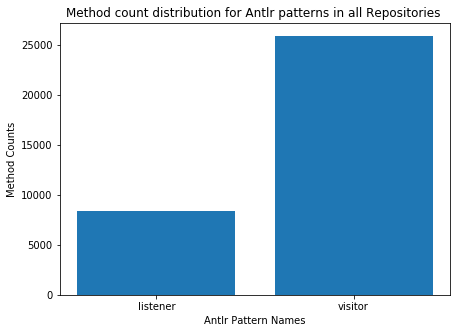

In [11]:
# _preparing data and labels needed for bar chart representation
bar_chart_datapoints = [listener_method_cnt, visitor_method_cnt]
bar_chart_labels = ['listener', 'visitor']
show_bar_chart(bar_chart_datapoints, bar_chart_labels, 'Antlr Pattern Names', 'Method Counts', 'Method count distribution for Antlr patterns in all Repositories ')

**5. Preparing the dataset for Listener Methods count Distribution**

In [12]:
# _taking enter, exit and both values directly from the csv
enter_exit_both_method_cnt = sum(repo_df['enter_exit_method_cnt'])
enter_method_cnt = sum(repo_df['enter_method_cnt'])
exit_method_cnt = sum(repo_df['exit_method_cnt'])

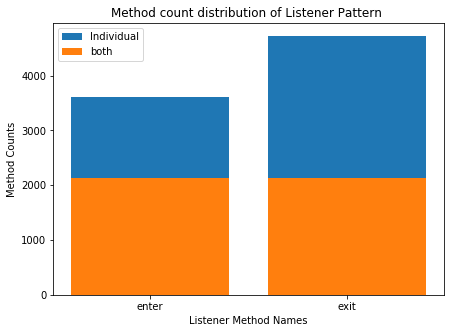

In [13]:
# _preparing data and labels needed for Overlapping bar chart representation
enter_exit_data_points = [enter_method_cnt, exit_method_cnt]
common_data_points = [enter_exit_both_method_cnt, enter_exit_both_method_cnt]
bar_chart_labels = ['enter', 'exit']
show_bar_chart_overlapped(enter_exit_data_points, common_data_points, bar_chart_labels, 'Listener Method Names', 'Method Counts', 'Method count distribution of Listener Pattern ')